In [1]:
import os

os.chdir ("..")

!ls

Makefile             mypy.ini             src
README.md            papers               test
data                 requirements-dev.txt weights
logs                 requirements.txt


# Test data loaders

In [1]:
from src.preprocessing.filters import Filter
from src.preprocessing.transformations import Transform
from src.dataset.dataset_cartoon import CartoonDataset
from torchvision import transforms
import matplotlib.pyplot as plt
from src.dataset.utils import Movie

In [2]:
filter_data = Filter()
transform = Transform()
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

12006


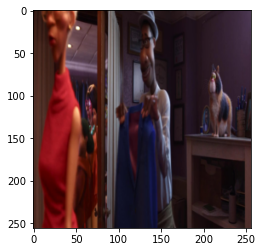

In [3]:
print(len(loader))
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [4]:
filter_data = Filter(selected_movies=[Movie.Coco, Movie.Soul])
transform = Transform()
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

2135


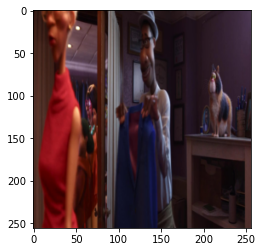

In [5]:
print(len(loader))
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [6]:
filter_data = Filter(ratio_filter_mode="landscape")
transform = Transform()
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)
print(len(loader))

0


In [7]:
filter_data = Filter(ratio_filter_mode="portrait")
transform = Transform()
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)
print(len(loader))

12006


In [8]:
filter_data = Filter(new_size=(1300, 5))
transform = Transform()
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)
print(len(loader))

0


In [9]:
filter_data = Filter(new_size=(5, 1300))
transform = Transform()
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)
print(len(loader))

10893


In [10]:
filter_data = Filter()
transform = Transform(new_size=(342, 342))
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

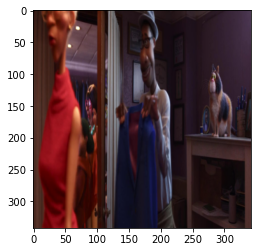

In [11]:
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [12]:
filter_data = Filter()
transform = Transform(crop_mode="center")
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

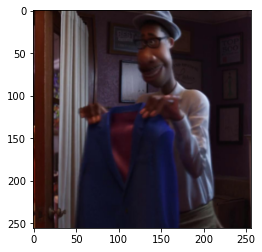

In [13]:
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [14]:
filter_data = Filter()
transform = Transform(crop_mode="random")
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

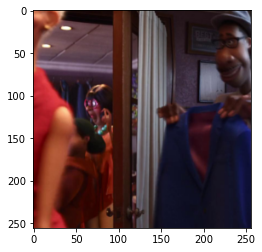

In [15]:
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [16]:
filter_data = Filter()
transform = Transform(new_size=None)
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

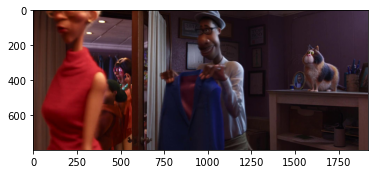

In [17]:
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [18]:
filter_data = Filter()
transform = Transform(new_size=(500, 200))
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

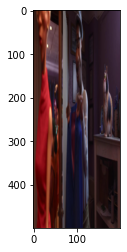

In [19]:
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

In [20]:
filter_data = Filter()
transform = Transform(new_size=(500, 200), crop_mode="center")
loader = CartoonDataset(filter_data=filter_data.cartoon_filter, transform=transform.cartoon_transform)

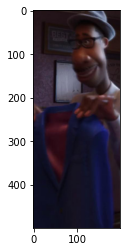

In [21]:
img = (loader[5]+1)/2
image = transforms.ToPILImage()(img)
plt.imshow(image)
plt.show()

# Init all params csv

In [1]:
from src.cartoon_gan_processor import (
    CartoonGanArchitecture, 
    CartoonGanModelParameters, 
    CartoonsDatasetParameters, 
    PicturesDatasetParameters, 
    CartoonGanBaseParameters, 
    ModelPathsParameters
)
from typing import Any
from src import config
from dataclasses import dataclass, asdict
import pandas as pd
from datetime import datetime

In [2]:
def __format_dataclass(dataclass: dataclass, prefix: str) -> dict[str, Any]:
    """To add a prefix on all the fields of a dictionary"""
    return {"{}_{}".format(prefix, k): v for (k, v) in asdict(dataclass).items()}

In [3]:
cartoon_gan_architecture = CartoonGanArchitecture.FIXED
cartoon_gan_model_params =  CartoonGanModelParameters.null_object()
cartoons_dataset_parameters = CartoonsDatasetParameters(
    new_size=(256, 256),
    ratio_filter_mode=None,
    crop_mode="center",
    selected_movies=config.MOVIES
)
pictures_dataset_parameters = PicturesDatasetParameters(
    new_size=(256, 256),
    ratio_filter_mode=None,
    crop_mode="center"
)
training_params = CartoonGanBaseParameters(
    batch_size=4,
    gen_lr=0.0002,
    disc_lr=0.0002,
    input_size=256,
    conditional_lambda=10,
    gen_beta1=0.5,
    gen_beta2=0.999,
    disc_beta1=0.5,
    disc_beta2=0.999
)
pretraining_params = training_params
init_models_paths = ModelPathsParameters(
    generator_path="gen.pkl",
    discriminator_path="disc.pkl"
)

In [5]:
global_params = {"run_id": datetime.now().strftime("%Y_%m_%d-%H_%M_%S")}
global_params.update({
    "cartoon_gan_architecture": cartoon_gan_architecture.value,
    **__format_dataclass(
        cartoon_gan_model_params, "cartoon_gan_model"
    ),
    **__format_dataclass(
        cartoons_dataset_parameters, "cartoon_dataset"
    ),
    **__format_dataclass(
        pictures_dataset_parameters, "pictures_dataset"
    ),
    **__format_dataclass(
        pretraining_params, "pretraining"
    ),
    **__format_dataclass(training_params, "training"),
    **__format_dataclass(init_models_paths, "init"),
})

In [6]:
global_params["epochs_pretrained_nb"] = 0
global_params["epochs_trained_nb"] = 0
global_params["train_discriminator_loss"] = 0
global_params["train_generator_loss"] = 0
global_params["train_conditional_loss"] = 0
global_params["pretrain_reconstruction_loss"] = 0
global_params

{'run_id': '2022_01_06-20_20_30',
 'cartoon_gan_architecture': 'Fixed architecture',
 'cartoon_gan_model_nb_resnet_blocks': None,
 'cartoon_gan_model_nb_channels_picture': None,
 'cartoon_gan_model_nb_channels_cartoon': None,
 'cartoon_gan_model_nb_channels_1st_hidden_layer_gen': None,
 'cartoon_gan_model_nb_channels_1st_hidden_layer_disc': None,
 'cartoon_dataset_new_size': (256, 256),
 'cartoon_dataset_ratio_filter_mode': None,
 'cartoon_dataset_crop_mode': 'center',
 'cartoon_dataset_selected_movies': [<Movie.BabyBoss: 'BabyBoss'>,
  <Movie.Cars3: 'Cars3'>,
  <Movie.Coco: 'Coco'>,
  <Movie.InsideOut: 'InsideOut'>,
  <Movie.Luca: 'Luca'>,
  <Movie.Onward: 'Onward'>,
  <Movie.Soul: 'Soul'>,
  <Movie.TheIncredibles: 'TheIncredibles'>,
  <Movie.TheSecretLifeOfPets: 'TheSecretLifeOfPets'>,
  <Movie.ToyStory4: 'ToyStory4'>,
  <Movie.Zootopia: 'Zootopia'>],
 'pictures_dataset_new_size': (256, 256),
 'pictures_dataset_ratio_filter_mode': None,
 'pictures_dataset_crop_mode': 'center',
 'pret

In [7]:
params = pd.Series(global_params)
params

run_id                                                                               2022_01_06-20_20_30
cartoon_gan_architecture                                                              Fixed architecture
cartoon_gan_model_nb_resnet_blocks                                                                  None
cartoon_gan_model_nb_channels_picture                                                               None
cartoon_gan_model_nb_channels_cartoon                                                               None
cartoon_gan_model_nb_channels_1st_hidden_layer_gen                                                  None
cartoon_gan_model_nb_channels_1st_hidden_layer_disc                                                 None
cartoon_dataset_new_size                                                                      (256, 256)
cartoon_dataset_ratio_filter_mode                                                                   None
cartoon_dataset_crop_mode                              

In [8]:
df = pd.DataFrame(columns=params.index)
# df = df.append(params, ignore_index=True)
df

,run_id,cartoon_gan_architecture,cartoon_gan_model_nb_resnet_blocks,cartoon_gan_model_nb_channels_picture,cartoon_gan_model_nb_channels_cartoon,cartoon_gan_model_nb_channels_1st_hidden_layer_gen,cartoon_gan_model_nb_channels_1st_hidden_layer_disc,cartoon_dataset_new_size,cartoon_dataset_ratio_filter_mode,cartoon_dataset_crop_mode,...,training_disc_beta2,training_input_size,init_generator_path,init_discriminator_path,epochs_pretrained_nb,epochs_trained_nb,train_discriminator_loss,train_generator_loss,train_conditional_loss,pretrain_reconstruction_loss


In [9]:
df.to_csv(config.ALL_PARAMS_CSV)

# Test processor

In [2]:
from src.cartoon_gan_processor import (
    CartoonGanProcessor, 
    CartoonGanModelParameters, 
    CartoonsDatasetParameters, 
    PicturesDatasetParameters, 
    CartoonGanBaseParameters, 
    ModelPathsParameters, 
    CartoonGanArchitecture
)

In [2]:
cartoon_gan_architecture = CartoonGanArchitecture.MODULAR
cartoon_gan_model_params =  CartoonGanModelParameters()
cartoons_dataset_parameters = CartoonsDatasetParameters(
    new_size=(256, 256),
    ratio_filter_mode=None,
    crop_mode="center",
    selected_movies=config.MOVIES
)
pictures_dataset_parameters = PicturesDatasetParameters(
    new_size=(256, 256),
    ratio_filter_mode=None,
    crop_mode="center"
)
training_params = CartoonGanBaseParameters(
    batch_size=4,
    gen_lr=0.0002,
    disc_lr=0.0002,
    input_size=256,
    conditional_lambda=10,
    gen_beta1=0.5,
    gen_beta2=0.999,
    disc_beta1=0.5,
    disc_beta2=0.999
)
pretraining_params = training_params
init_models_paths = None
# init_models_paths = ModelPathsParameters(
#     generator_path="weights/2022_01_06-20_29_54/pretrained_gen_1.pkl",
#     discriminator_path="weights/2022_01_06-20_29_54/pretrained_disc_1.pkl"
# )

In [3]:
processor = CartoonGanProcessor(
    cartoons_dataset_parameters=cartoons_dataset_parameters, 
    pictures_dataset_parameters=pictures_dataset_parameters, 
    training_parameters=training_params, 
    pretraining_parameters=pretraining_params,
    cartoon_gan_model_parameters=cartoon_gan_model_params, 
    init_models_paths=init_models_paths, 
    extraction=False,
    nb_images_cartoons=-1,
    nb_images_pictures=-1
)

Nvidia card unavailable, running on CPU


/Users/antoinestutz/opt/anaconda3/envs/deepl/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [4]:
processor.train(nb_epochs=1)

No model found
Epoch 1/1


/Users/antoinestutz/opt/anaconda3/envs/deepl/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
  0%|          | 0/3001 [00:00<?, ?it/s]

In [5]:
processor.cartoonize_images(nb_images=3)

trained_gen_1.pkl trained_disc_1.pkl
trained_gen_0.pkl trained_disc_0.pkl
pretrained_gen_1.pkl pretrained_disc_1.pkl
pretrained_gen_0.pkl pretrained_disc_0.pkl
Model found:  {'generator_path': 'weights/2022_01_05-22_01_23/trained_gen_1.pkl', 'discriminator_path': 'weights/2022_01_05-22_01_23/trained_disc_1.pkl'}


  0%|          | 0/1993 [00:24<?, ?it/s]


[tensor([[[-0.4468, -0.5953, -0.0725,  ..., -0.6597, -0.1721, -0.3007],
          [-0.5107, -0.3680, -0.5647,  ..., -0.2754, -0.1472, -0.0240],
          [-0.2624, -0.6395,  0.2462,  ..., -0.2096, -0.6035, -0.1309],
          ...,
          [-0.1764, -0.0018, -0.4068,  ...,  0.4110, -0.1141, -0.2398],
          [ 0.0754, -0.3089, -0.0777,  ..., -0.5785, -0.2277, -0.5850],
          [ 0.3806,  0.0541, -0.1553,  ..., -0.0355,  0.0478, -0.1566]],
 
         [[-0.2655, -0.5010,  0.1849,  ..., -0.2054,  0.0227,  0.1401],
          [-0.0088, -0.0138, -0.2450,  ...,  0.1841,  0.1184,  0.0688],
          [ 0.0855,  0.2511,  0.2768,  ..., -0.0353, -0.0539,  0.1128],
          ...,
          [-0.1460,  0.0132,  0.3900,  ...,  0.2833,  0.3297,  0.5233],
          [-0.1536, -0.0055,  0.2351,  ...,  0.3320,  0.2859,  0.4347],
          [ 0.0303,  0.2073,  0.3201,  ...,  0.0590,  0.3080,  0.1886]],
 
         [[ 0.6015,  0.3367,  0.3980,  ...,  0.1881,  0.4342,  0.1908],
          [ 0.5738,  0.5738,